# Unsupervised Learning and Gene Expression Data

This lab will walk you through some examples of unsupervised learning in Gene Expression.

In [1]:
library(golubEsets)
data(Golub_Merge)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To c

<H2> MDS/PCA

We have loaded the Golub_Merge data set that was used in the statistics lecture. It is a pretty complex data type used by Bioconductor.

In [2]:
class(Golub_Merge)
head(Golub_Merge)
summary(Golub_Merge)


[1] "ExpressionSet"
attr(,"package")
[1] "Biobase"

ExpressionSet (storageMode: lockedEnvironment)
assayData: 1 features, 72 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 39 40 ... 33 (72 total)
  varLabels: Samples ALL.AML ... Source (11 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 10521349 
Annotation: hu6800 

       Length         Class          Mode 
            1 ExpressionSet            S4 

In [3]:
#Fortunately, bioconductor has a function to extract the expression data:

Golub.expression.data=exprs(Golub_Merge)
head(Golub.expression.data)
dim(Golub.expression.data)


39   40   42   47   48   49   41   43   44   45   46   70
AFFX-BioB-5_at  -342  -87   22 -243 -130 -256  -62   86 -146 -187  -56  -55
AFFX-BioB-M_at  -200 -248 -153 -218 -177 -249  -23  -36  -74 -187  -43  -44
AFFX-BioB-3_at    41  262   17 -163  -28 -410   -7 -141  170  312   43   12
AFFX-BioC-5_at   328  295  276  182  266   24  142  252  174  142  177  129
AFFX-BioC-3_at  -224 -226 -211 -289 -170 -535 -233 -201  -32  114 -116 -108
AFFX-BioDn-5_at -427 -493 -250 -268 -326 -810 -284 -384 -318 -148 -184 -301
                  71   72   68   69   67   55   56   59   52   53   51   50
AFFX-BioB-5_at   -59 -131 -154  -79  -76  -34  -95  -12  -21 -202 -112 -118
AFFX-BioB-M_at  -114 -126 -136 -118  -98 -144 -118 -172  -13 -274 -185 -142
AFFX-BioB-3_at    23  -50   49  -30 -153  -17   59   12    8   59   24  212
AFFX-BioC-5_at   146  211  180   68  237  152  270  172   38  309  170  314
AFFX-BioC-3_at  -171 -206 -257 -110 -215 -174 -229 -137 -128 -456 -197 -401
AFFX-BioDn-5_at -227 -287 -273 -264 -122 -289 -383 -205 -245 -581 -400 -452
                  54   57   58   60   61   65   66   63   64   62    1    2
AFFX-BioB-5_at   -90 -137 -157 -172  -47  -62  -58 -161  -48 -176 -214 -139
AFFX-BioB-M_at   -87  -51 -370 -122 -442 -198 -217 -215 -531 -284 -153  -73
AFFX-BioB-3_at   102  -82  -77   38  -21   -5   63  -46 -124  -81  -58   -1
AFFX-BioC-5_at   319  178  340   31  396  141   95  146  431    9   88  283
AFFX-BioC-3_at  -283 -135 -438 -201 -351 -256 -191 -172 -496 -294 -295 -264
AFFX-BioDn-5_at -385 -320 -364 -226 -394 -206 -230 -596 -696 -493 -558 -400
                   3    4    5    6    7    8    9   10   11   12   13   14
AFFX-BioB-5_at   -76 -135 -106 -138  -72 -413    5  -88 -165  -67  -92 -113
AFFX-BioB-M_at   -49 -114 -125  -85 -144 -260 -127 -105 -155  -93 -119 -147
AFFX-BioB-3_at  -307  265  -76  215  238    7  106   42  -71   84  -31 -118
AFFX-BioC-5_at   309   12  168   71   55   -2  268  219   82   25  173  243
AFFX-BioC-3_at  -376 -419 -230 -272 -399 -541 -210 -178 -163 -179 -233 -127
AFFX-BioDn-5_at -650 -585 -284 -558 -551 -790 -535 -246 -430 -323 -227 -398
                  15   16   17   18   19   20   21   22   23   24   25   26
AFFX-BioB-5_at  -107 -117 -476  -81  -44   17 -144 -247  -74 -120  -81 -112
AFFX-BioB-M_at   -72 -219 -213 -150  -51 -229 -199  -90 -321 -263 -150 -233
AFFX-BioB-3_at  -126  -50  -18 -119  100   79 -157 -168  -11 -114  -85  -78
AFFX-BioC-5_at   149  257  301   78  207  218  132  -24  -36  255  316   54
AFFX-BioC-3_at  -205 -218 -403 -152 -146 -262 -151 -308 -317 -342 -418 -244
AFFX-BioDn-5_at -284 -402 -394 -340 -221 -404 -347 -571 -499 -396 -461 -275
                  27   34   35   36   37   38   28   29   30   31   32   33
AFFX-BioB-5_at  -273  -20    7 -213  -25  -72   -4   15 -318  -32 -124 -135
AFFX-BioB-M_at  -327 -207 -100 -252  -20 -139 -116 -114 -192  -49  -79 -186
AFFX-BioB-3_at   -76  -50  -57  136  124   -1 -125    2  -95   49  -37  -70
AFFX-BioC-5_at    81  101  132  318  325  392  241  193  312  230  330  337
AFFX-BioC-3_at  -439 -369 -377 -209 -396 -324 -191  -51 -139 -367 -188 -407
AFFX-BioDn-5_at -616 -529 -478 -557 -464 -510 -411 -155 -344 -508 -423 -566

[1] 7129   72

In [4]:
# Now, we compute the distance matrix:

Golub.distance.matrix=dist(t(Golub.expression.data))

# We used 't' to transpose the matrix. This is just because dist works on rows and we want distance on columns.

as.matrix(Golub.distance.matrix)
 
dim(as.matrix(Golub.distance.matrix))


39        40        42        47        48        49        41
39      0.00 101530.75  94405.04 115681.47 116666.76  93189.94 101409.86
40 101530.75      0.00  89502.29  98459.66  92980.41  79182.93  81381.99
42  94405.04  89502.29      0.00 106954.74  88800.74  91730.07  91400.22
47 115681.47  98459.66 106954.74      0.00 115169.01 109182.78  93290.25
48 116666.76  92980.41  88800.74 115169.01      0.00  96797.57  92101.83
49  93189.94  79182.93  91730.07 109182.78  96797.57      0.00  83416.59
41 101409.86  81381.99  91400.22  93290.25  92101.83  83416.59      0.00
43 117607.80 109351.49 102774.80 105747.55 124344.70 115825.70  96494.16
44  86952.11  87252.81  90296.87  97237.77  98684.88  89241.89  76495.71
45  97854.98  88662.66  90580.08  97784.68  88248.94  92708.79  77813.45
46  92051.88  89667.39  90853.57  93137.59 103778.05  97774.99  86164.83
70  94474.13  90543.04  98962.53  84884.53 106380.76  82446.67  71787.87
71  91210.45  75801.00  76012.23 102929.63  85124.87  87899.05  78620.69
72  85805.53  75909.42  72368.40  85522.11  78803.39  83746.60  73045.54
68 113371.01  94525.09  86831.78 106406.65  72720.88  93627.37  79041.14
69 114328.27  93648.66  81837.89 116631.87  60917.93  95780.40  86820.86
67 104923.78  95253.66  85413.63  97688.81 101947.61  95155.97  90714.19
55 111413.43  97525.76 106238.21  86992.59 120793.83  99316.84  70971.42
56 108328.44  98873.49 113378.45  83151.64 125261.31 105717.14  93574.86
59 131576.81 129513.07 132666.33 110509.42 147825.25 138870.96 131165.93
52 146292.31 114630.41 124510.07 137416.98 118992.80 122808.21 108944.69
53 125260.80 107918.30 104758.99 123460.82 110098.63 105379.23 110035.81
51 119563.02 100986.86 108365.67  92753.54 122200.84 106407.60  96717.00
50 111571.33  91490.73  96750.93 117469.57  96909.77  97395.11  95800.35
54 121443.98 105489.59 110185.63 106679.41 115078.24 104694.66  89456.53
57 123630.18 103912.50 112490.83 109090.61 127041.12 109797.54  84165.95
58 130139.75 136763.45 138157.18 113752.45 161925.15 137183.43 141270.49
60 147424.87 133248.16 138021.47 121755.07 148109.37 136291.79 122187.43
61 101303.33  99757.28 102612.77  99438.45 119574.99  96988.60  99894.58
65 102585.50  83294.33  89829.04 108657.02  96223.02  86370.07  74878.08
66 121433.89 103875.60 110451.52  77218.05 117468.47 113785.77  86325.76
63 125165.69 101463.70 107254.25 132092.65 102745.73 100148.58 108930.40
64 136150.37 114366.44 135081.57 137038.93 142661.54 116323.91 121655.85
62 134686.50 119255.87 130213.77 120742.54 143562.07 123848.06 123916.12
1   96244.24  74056.42  84472.41 101684.38  71945.79  71911.04  83305.60
2  118572.88  98464.77  91919.90 115858.93  84548.94  95059.47  97956.94
3  125121.10 109343.31 110117.24 119516.78  99655.96  96877.56 103517.97
4  104271.15  74924.63  89357.45  95092.89  75995.25  72112.10  64981.05
5  108967.47  84841.67  85457.43 108922.79  70145.98  87025.88  64495.93
6  114170.44 112068.60 114210.45 127132.98 124423.12  98064.91  93563.84
7  108355.68  92657.01 106316.67  95667.08 109795.78  85273.68  88658.31
8   94539.43  74676.17  86509.12 107828.79  94627.54  71993.07  90935.71
9  139013.58 123645.04 118097.48 143624.61  98682.76 112345.76 108407.50
10 114732.52 102559.63  98142.28 118659.66  97300.35  96826.12  82671.56
11 121155.12  98899.73  97775.99 113198.68  91682.74  95858.37  82409.31
12  96022.30  72476.29  83746.68  97316.59  95422.63  82230.95  67067.01
13  95335.68  76779.53  72302.15  98117.36  54920.16  85930.63  79471.36
14 122539.06  86400.32  96436.04 104820.95  85607.40  89686.83  84886.13
15 112437.51  91468.72  93265.26 119314.07  62914.02  88941.48  74370.16
16 104436.35  78686.05  89565.09  97353.79  72216.56  74486.52  62357.92
17 133954.97 110465.27 109687.21 122182.12  89196.50 105574.18 110887.68
18 101119.28  82748.27  92728.43 105687.62  98133.87  89509.99  76131.14
19 100086.20  64888.86  79378.57  88448.29  76186.58  80035.85  66720.95
20 151359.74 136915.49 126484.84 153195.38  86549.34 132540.44 12792

[1] 72 72

In [5]:
# cmdscale takes the distance matrix and produces a 72x2 matrix,
#    while preserving the distances between the 72 subjects.

MDS=cmdscale(Golub.distance.matrix) 
as.matrix(dist(MDS))[,1:3]


39        40         42
39     0.000 16038.243 29333.9767
40 16038.243     0.000 13605.9705
42 29333.977 13605.971     0.0000
47 23552.942 39417.412 52201.8324
48 64453.985 49578.213 40471.7633
49 23270.239  7549.204  8813.7106
41 18897.469 12677.087 22203.3990
43 24877.928 39980.535 52022.3290
44 11608.837 19495.187 32620.3645
45 21986.181 12334.769 19276.3804
46 12353.197 27480.575 41065.2781
70 11567.234 25791.267 39396.0383
71 32141.624 16404.842  8766.0627
72 21340.213  8112.771 14064.7549
68 46960.488 30967.841 19043.3117
69 60749.413 44960.977 33626.7934
67 23261.040 13495.341 13501.6079
55 28240.254 43921.796 56440.5932
56 43148.725 59156.897 72449.6131
59 60222.261 75936.397 88284.3690
52 68650.757 56900.813 45852.5701
53 66068.754 55304.868 45202.5766
51 34445.442 39368.209 44407.9442
50 61453.662 50071.026 39578.0327
54 38451.916 34484.939 32855.4111
57 22336.961 26702.353 33277.0792
58 78923.951 90817.418 99201.3294
60 47008.886 58032.465 66401.4951
61 31936.162 38859.939 45389.6195
65 41662.856 30493.640 21729.9705
66 21850.163 37387.349 50943.1520
63 82192.963 70577.491 59369.1969
64 34644.755 31620.690 31385.2776
62 69307.235 69175.940 68033.2251
1  36152.496 21411.231 15742.9258
2  61654.598 45630.726 32581.9101
3  43095.396 28307.294 21029.9322
4  32738.075 18527.078 15274.1430
5  52956.849 37243.332 26429.7458
6  16636.233  3425.618 14736.1868
7   8715.126 22396.931 36000.2177
8  21703.201  6627.592 11047.1682
9  84087.770 68371.595 56914.2747
10 43710.162 28192.593 18740.4977
11 47169.601 32728.467 25695.9433
12 15850.426  2929.899 13527.1846
13 38671.042 23960.291 17704.4514
14 42313.090 26675.200 16940.5991
15 63945.965 48678.773 38722.0035
16 39902.323 26454.032 22482.6239
17 60941.432 44903.210 32095.0353
18 28732.089 12930.653   806.1521
19 27388.720 14671.521 16341.8069
20 98883.037 83615.342 73062.1021
21 52623.724 41433.733 38914.2628
22 16569.076 14722.650 25846.3448
23 21246.995 19170.841 28929.5177
24 49496.968 34589.971 26278.4789
25 38157.821 22204.470 11306.9727
26 30319.855 17702.386 18000.4688
27 14045.361 14890.927 27010.6740
34 44953.250 31688.226 20194.2071
35 32381.164 48259.477 60995.7334
36 96731.941 89595.742 81809.3500
37 79560.164 68649.064 58065.0320
38 46883.788 31260.944 17656.2586
28 55168.943 39794.515 26215.2531
29 25746.278 13666.881 10084.2990
30 82071.026 69898.039 58247.5862
31 37452.565 27353.926 20502.1114
32 50914.930 37305.236 25121.4327
33 69612.214 58251.048 47514.4686

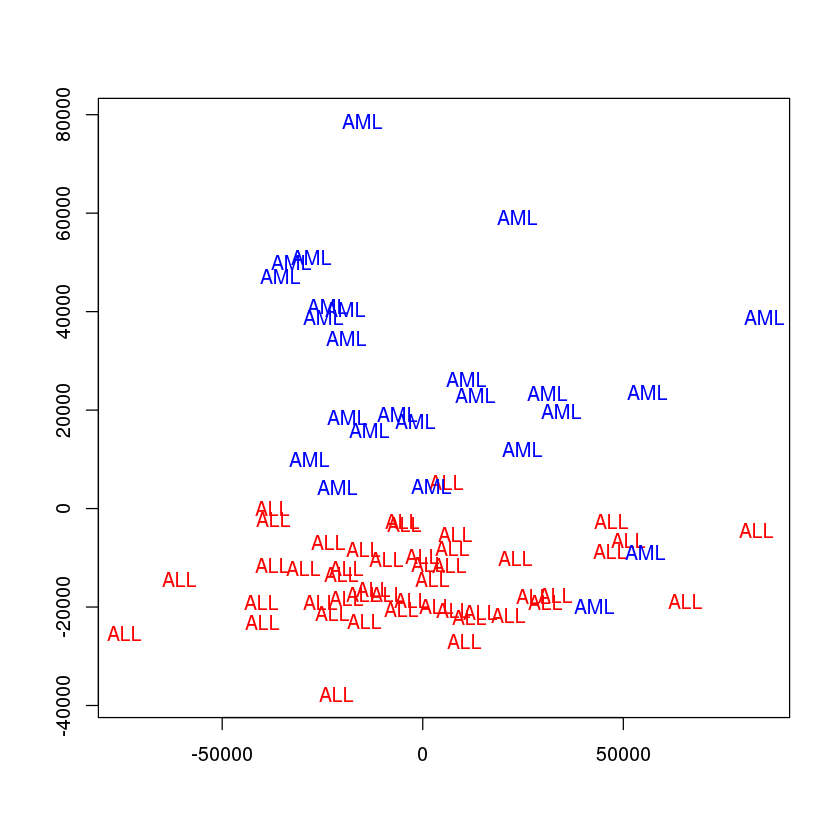

In [6]:
# Now, we just plot the result.

plot(MDS,col=c(2,4)[ pData(Golub_Merge)[["ALL.AML"]]],pch=19,type="n",xlab="",ylab="")  
text(MDS,as.character(pData(Golub_Merge)[["ALL.AML"]]),col=c(2,4)[pData(Golub_Merge)[["ALL.AML"]]])

# We observe the clustering of AML patients together and ALL patients together.


<H2> Heat Map

We will now generate the 'noisy' heatmap from this morning's lecture. We will generate data with *no* correspondence between gene expression and group membership.

In [7]:
# Simulate noisy HM
# load the necessary libraries

library(pheatmap)
library(genefilter)





Attaching package: ‘genefilter’

The following object is masked from ‘package:base’:

    anyNA



In [11]:
# n = number of members of each group, m = number of genes, alpha = significance level
# The data simulation is almost exactly the same as the noise simulation from the supervised learning lab

simulate.noise.heatmap=function(n,m,alpha)
  {
    # Simulate Expression Matrix
    
    EXPRS=matrix(rnorm(2*n*m),m,2*n) # Just randomly chosen, normally distributed values (N(0,1))
    
    rownames(EXPRS)=paste("Gene",1:m,sep="")
    colnames(EXPRS)=paste("patient id",1:(2*n),sep="")
    
    # Assign first n patients to group 1, second n patients to group 2
    grp=factor(rep(0:1,c(n,n))) 
    
    # Get the two sample t-statistics
    # run rowttests on the expression values and extract the p-values for each gene
    pvals=rowttests(EXPRS, grp)$p.value

    
    #Choose the genes that have p-values smaller than significance level
    topgenes=which(pvals<alpha)
    EXPRS=EXPRS[topgenes,]
    
    # Just annotate which group each patient is in
    annodat=data.frame(Condition=ifelse(grp==0,"N","Y"),row.names=colnames(EXPRS))
   

    # draw heatmap
    pheatmap(EXPRS,
             border_color =NA,
             show_rownames = FALSE,
             show_colnames=FALSE,
             annotation_col=annodat,
             color=colorRampPalette(c("red3", "black", "green3"))(50),
             annotation_colors=list(Condition=c(Y="blue",N="yellow")))
    
    return(length(topgenes))  # return the number of topgenes found
}



[1] 104


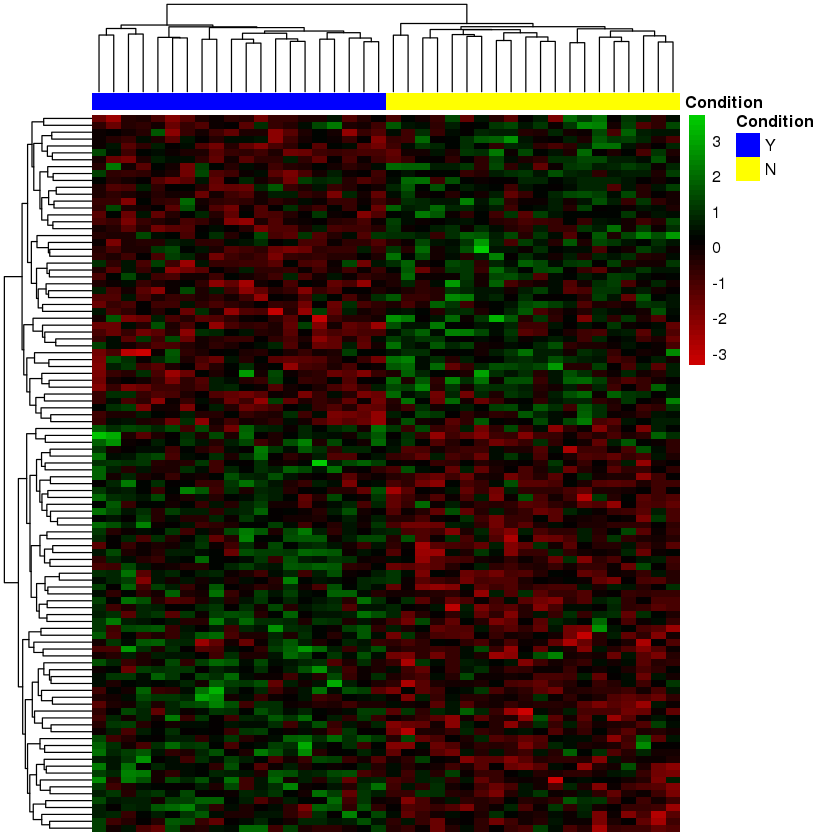

In [13]:
set.seed(765)

# run with sample of 20000 genes and significance 0.005
aa=simulate.noise.heatmap(20,20000,0.005)
print(aa)



[1] 99


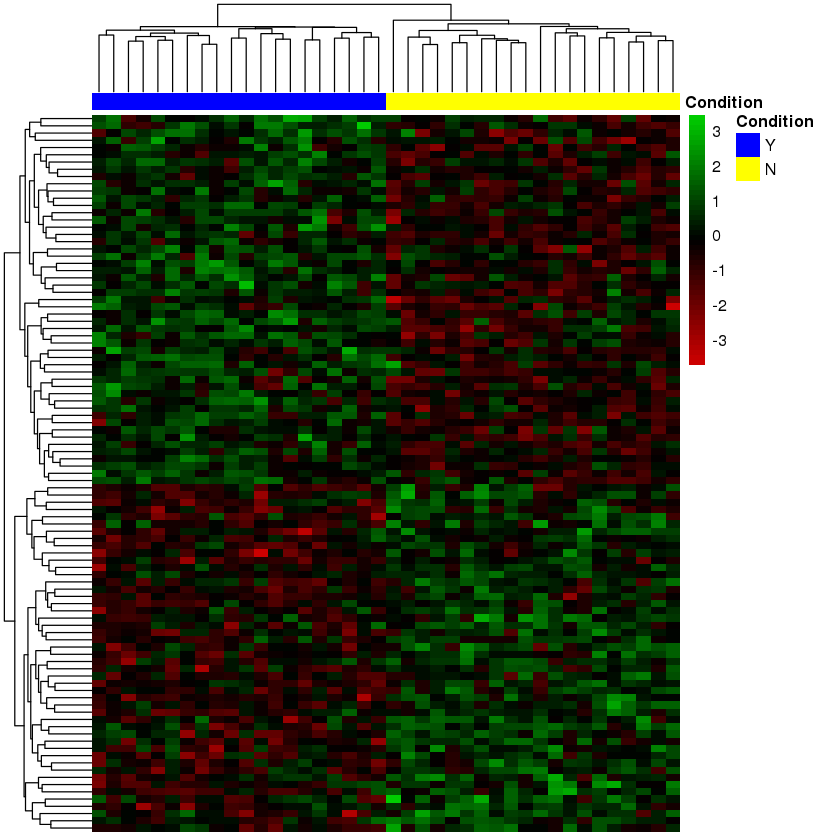

In [10]:
#Now simulate 40000 genes with significance 0.0025
aa=simulate.noise.heatmap(20,40000,0.0025)
print(aa)



[1] 110


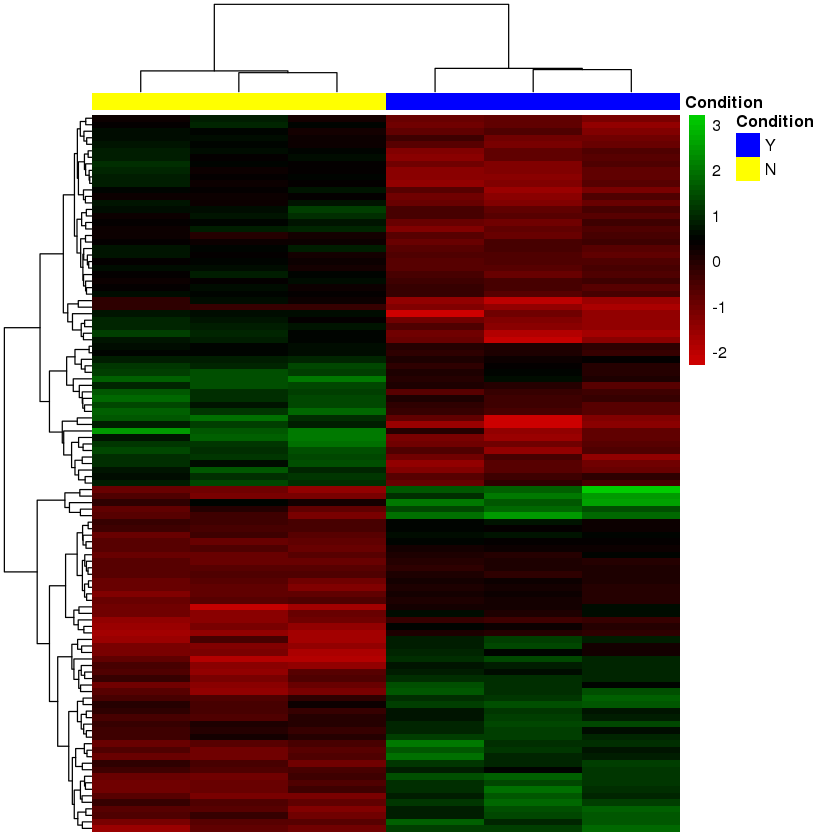

In [11]:
# And now a sample of only 6 patients, with 20000 genes and significance level of 0.005
aa=simulate.noise.heatmap(3,20000,0.005)
print(aa)